In [1]:
import os
import configparser

# Loading configurations
configParser = configparser.RawConfigParser()   
configFilePath = r'configuration.txt'
configParser.read(configFilePath)

insert_amd_env_vars =  int(configParser.get('COMMON', 'insert_amd_env_vars'))
HSA_OVERRIDE_GFX_VERSION =  configParser.get('COMMON', 'HSA_OVERRIDE_GFX_VERSION')
ROCM_PATH =  configParser.get('COMMON', 'ROCM_PATH')

if(insert_amd_env_vars != 0):
    os.environ["HSA_OVERRIDE_GFX_VERSION"] = HSA_OVERRIDE_GFX_VERSION
    os.environ["ROCM_PATH"] = ROCM_PATH


In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

2023-11-12 10:26:58.558980: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 10:26:58.622793: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2023-11-12 10:26:59.131367: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-11-12 10:26:59.131423: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-11-12 10:26:59.131431: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Default GPU Device: /device:GPU:0


2023-11-12 10:26:59.905243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 10:26:59.953680: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 10:26:59.953868: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 10:27:00.459297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 10:27:00.459454: I tensorflow/compiler/xla/stream_executo

In [3]:
from textwrap import wrap
import os
import gc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#TODO document jupyter
import pickle
import configparser
import sqlite3 as sl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

configParser = configparser.RawConfigParser()   
configFilePath = r'configuration.txt'
configParser.read(configFilePath)
datasetPathDatabase =  configParser.get('COMMON', 'datasetPathDatabase') + '/dataset.db'
datasetPathDatabaseAdditional =  configParser.get('COMMON', 'datasetPathDatabase') + '/datasetAdditional.db'
datasetPathDatabaseVgg =  configParser.get('COMMON', 'datasetPathDatabase') + '/datasetFacesBlurred.db'
image_size =  int(configParser.get('COMMON', 'resizeImageTo'))
begin_with_image_size = int(configParser.get('COMMON', 'begin_with_image_size'))
unet1_dim =  int(configParser.get('COMMON', 'unet1_dim'))
unet2_dim =  int(configParser.get('COMMON', 'unet2_dim'))
unet1_image_size =  int(configParser.get('COMMON', 'unet1_image_size'))
audio_embs =  str(configParser.get('COMMON', 'audio_embs'))
audio_length_used =  configParser.get('train_imagen', 'audio_length_used') 
model_filename =  configParser.get('train_imagen', 'model_filename')
sub_epochs=  int(configParser.get('train_imagen', 'sub_epochs') )
inner_epochs=  int(configParser.get('train_imagen', 'inner_epochs') )
batch_size=  int(configParser.get('train_imagen', 'batch_size') )
timesteps= int(configParser.get('COMMON', 'timesteps') )
sample_every=  int(configParser.get('train_imagen', 'sample_every') ) - 1
sample_probability = int(configParser.get('train_imagen', 'sample_probability') )
save_model_every=  int(configParser.get('train_imagen', 'save_model_every') )
sample_every_offset=  int(configParser.get('train_imagen', 'sample_every_offset') ) - 1
save_every_offset=  int(configParser.get('train_imagen', 'save_every_offset') ) - 1
imagen_samples_folder = configParser.get('train_imagen', 'imagen_samples_folder') 
db_chunk = int(configParser.get('train_imagen', 'db_chunk'))
dask_chunk = int(configParser.get('train_imagen', 'dask_chunk'))
stop_at_no_of_samples = int(configParser.get('train_imagen', 'stop_at_no_of_samples'))
epochs = int(configParser.get('train_imagen', 'epochs'))
ignore_speaker_embedding = bool(int(configParser.get('train_imagen', 'ignore_speaker_embedding') ))
ignore_speech_brain = bool(int(configParser.get('train_imagen', 'ignore_speech_brain') ))
ignore_pyannote_titanet_speakernet = bool(int(configParser.get('train_imagen', 'ignore_pyannote_titanet_speakernet') ))
ignore_audio_features = bool(int(configParser.get('train_imagen', 'ignore_audio_features') ))
ignore_pyAudioAnalysis = bool(int(configParser.get('train_imagen', 'ignore_pyAudioAnalysis') ))
ignore_librosa = bool(int(configParser.get('train_imagen', 'ignore_librosa') ))
ignore_image_guide = bool(int(configParser.get('train_imagen', 'ignore_image_guide') ))
ignore_additional_attributes = bool(int(configParser.get('train_imagen', 'ignore_additional_attributes') ))
ignore_age = bool(int(configParser.get('train_imagen', 'ignore_age') ))
ignore_gender = bool(int(configParser.get('train_imagen', 'ignore_gender') ))
ignore_ethnicity = bool(int(configParser.get('train_imagen', 'ignore_ethnicity') ))
ignore_language_spoken = bool(int(configParser.get('train_imagen', 'ignore_language_spoken') ))


pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None



In [4]:
from textwrap import wrap
import os

import keras_cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
from keras_cv.models.stable_diffusion.clip_tokenizer import SimpleTokenizer
from keras_cv.models.stable_diffusion.diffusion_model import DiffusionModel
from keras_cv.models.stable_diffusion.image_encoder import ImageEncoder
from keras_cv.models.stable_diffusion.noise_scheduler import NoiseScheduler
from keras_cv.models.stable_diffusion.text_encoder import TextEncoder
from tensorflow import keras


/home/gamal/anaconda3/envs/ds2f_m_s/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
class Trainer(tf.keras.Model):
    # Reference:
    # https://github.com/huggingface/diffusers/blob/main/examples/text_to_image/train_text_to_image.py

    def __init__(
        self,
        diffusion_model,
        vae,
        noise_scheduler,
        use_mixed_precision=False,
        max_grad_norm=1.0,
        **kwargs
    ):
        super().__init__(**kwargs)

        self.diffusion_model = diffusion_model
        self.vae = vae
        self.noise_scheduler = noise_scheduler
        self.max_grad_norm = max_grad_norm

        self.use_mixed_precision = use_mixed_precision
        self.vae.trainable = False

    def train_step(self,inputs):
        images = inputs["images"]
        encoded_text = inputs["encoded_text"]
        batch_size = tf.shape(images)[0]

        with tf.GradientTape() as tape:
            # Project image into the latent space and sample from it.
            latents = self.sample_from_encoder_outputs(self.vae(images, training=False))
            # Know more about the magic number here:
            # https://keras.io/examples/generative/fine_tune_via_textual_inversion/
            latents = latents * 0.18215

            # Sample noise that we'll add to the latents.
            noise = tf.random.normal(tf.shape(latents))
            #print(noise.shape)

            # Sample a random timestep for each image.
            timesteps = tnp.random.randint(
                0, self.noise_scheduler.train_timesteps, (batch_size,)
            )

            # Add noise to the latents according to the noise magnitude at each timestep
            # (this is the forward diffusion process).
            noisy_latents = self.noise_scheduler.add_noise(
                tf.cast(latents, noise.dtype), noise, timesteps
            )

            # Get the target for loss depending on the prediction type
            # just the sampled noise for now.
            target = noise  # noise_schedule.predict_epsilon == True

            # Predict the noise residual and compute loss.
            timestep_embedding = tf.map_fn(
                lambda t: self.get_timestep_embedding(t), timesteps, dtype=tf.float32
            )
            timestep_embedding = tf.squeeze(timestep_embedding, 1)
            model_pred = self.diffusion_model(
                [noisy_latents, timestep_embedding, encoded_text], training=True
            )
            loss = self.compiled_loss(target, model_pred)
            if self.use_mixed_precision:
                loss = self.optimizer.get_scaled_loss(loss)

        # Update parameters of the diffusion model.
        trainable_vars = self.diffusion_model.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        if self.use_mixed_precision:
            gradients = self.optimizer.get_unscaled_gradients(gradients)
        gradients = [tf.clip_by_norm(g, self.max_grad_norm) for g in gradients]
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        return {m.name: m.result() for m in self.metrics}

    def get_timestep_embedding(self, timestep, dim=320, max_period=10000):
        half = dim // 2
        log_max_period = tf.math.log(tf.cast(max_period, tf.float32))
        freqs = tf.math.exp(
            -log_max_period * tf.range(0, half, dtype=tf.float32) / half
        )
        args = tf.convert_to_tensor([timestep], dtype=tf.float32) * freqs
        embedding = tf.concat([tf.math.cos(args), tf.math.sin(args)], 0)
        embedding = tf.reshape(embedding, [1, -1])
        return embedding

    def sample_from_encoder_outputs(self, outputs):
        mean, logvar = tf.split(outputs, 2, axis=-1)
        logvar = tf.clip_by_value(logvar, -30.0, 20.0)
        std = tf.exp(0.5 * logvar)
        sample = tf.random.normal(tf.shape(mean), dtype=mean.dtype)
        return mean + std * sample

    def save_weights(self, filepath, overwrite=True, save_format=None, options=None):
        # Overriding this method will allow us to use the `ModelCheckpoint`
        # callback directly with this trainer class. In this case, it will
        # only checkpoint the `diffusion_model` since that's what we're training
        # during fine-tuning.
        self.diffusion_model.save_weights(
            filepath=filepath,
            overwrite=overwrite,
            save_format=save_format,
            options=options,
        )


In [6]:
# Enable mixed-precision training if the underlying GPU has tensor cores.
USE_MP = True
if USE_MP:
    keras.mixed_precision.set_global_policy("mixed_float16")

image_encoder = ImageEncoder(image_size, image_size)
diffusion_ft_trainer = Trainer(
    diffusion_model=DiffusionModel(image_size, image_size, 256),
    # Remove the top layer from the encoder, which cuts off the variance and only
    # returns the mean.
    vae=tf.keras.Model(
        image_encoder.input,
        image_encoder.layers[-2].output,
    ),
    noise_scheduler=NoiseScheduler(),
    use_mixed_precision=USE_MP,
)

# These hyperparameters come from this tutorial by Hugging Face:
# https://huggingface.co/docs/diffusers/training/text2image
lr = 1e-5
beta_1, beta_2 = 0.9, 0.999
weight_decay = (1e-2,)
epsilon = 1e-08

optimizer = tf.keras.optimizers.experimental.AdamW(
    learning_rate=lr,
    weight_decay=weight_decay,
    beta_1=beta_1,
    beta_2=beta_2,
    epsilon=epsilon,
)
diffusion_ft_trainer.compile(optimizer=optimizer, loss="mse")


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Quadro RTX 6000, compute capability 7.5


2023-11-12 10:27:01.000237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 10:27:01.000544: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 10:27:01.000714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 10:27:01.000952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-12 10:27:01.056365: I tensorflow/compiler/xla/stream_executo

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [7]:
def speaker_emb_preprocess(speaker_emb2):

    if(ignore_speaker_embedding or ignore_speech_brain):
        #print('ignore speech brain')
        return np.zeros((1,768))
    else:
        speaker_emb2 = pickle.loads(speaker_emb2)
        #print(speaker_emb2.print)
        speaker_emb2 = speaker_emb2.squeeze()
        speaker_emb2 = np.pad(speaker_emb2, (288), 'constant', constant_values=(0))
        speaker_emb2 = np.tile(speaker_emb2, (1, 1))
        speaker_emb2 = speaker_emb2 / 200.0
        #print(speaker_emb2.shape)
        #speaker_emb2 = np.array(speaker_emb2).tolist()
        #print(type(speaker_emb2))
        return speaker_emb2


def audio_emb_preprocess2(speaker_emb2):
    
    if(ignore_pyannote_titanet_speakernet or ignore_speaker_embedding):
        #print('ignore speech brain')
        return np.zeros((28,768))
    else:
        #print(speaker_emb2)
        speaker_emb2 = pickle.loads(speaker_emb2)
        a = speaker_emb2 #np.zeros(shape=(24, 512))
        a = a[-28:,:] # Actually only last 39 are the relevant ones
        #print('au')
        #print(a.shape)
        b = np.zeros(shape=(a.shape[0], 768-a.shape[1]))
        #c = np.zeros(shape=(28-a.shape[0], 768))
        arr = np.concatenate((a, b), axis=1)
        #arr = np.concatenate((arr, c), axis=0)
        arr = arr / (1 if(audio_embs == 'wav2vec') else 10 if(audio_embs == 'openl3')  else 1 if(audio_embs == 'pyannoteTitaNet') else 1)
        #print(str(arr.max()))
        #print(arr.shape)
        speaker_emb2 = np.array(arr)
        return speaker_emb2

def audio_features_preprocess(video_id):
    #  79 belong to pyaudioanalysis
    # 111 belogn to liborsa
    if(ignore_audio_features):
        #print('ignore speech brain')
        return np.zeros((190,768))
    else:
        #print(video_id)
        conAdditional = sl.connect(datasetPathDatabaseAdditional)
        cur = conAdditional.cursor()
        sql = '''SELECT AUDIO_FEATURES FROM AUDIO WHERE VIDEO_ID = ?'''
        cur.execute(sql, [video_id])
        audio_features = cur.fetchall()
        #print(audio_features[0])
        audio_features = pickle.loads(audio_features[0][0])
        #print(audio_features.shape) # 190 x 128
        audio_features = audio_features[0:190]
        
        #import sys
        #np.set_printoptions(threshold=sys.maxsize)
        #print(np.argwhere(audio_features == 0))

        if(ignore_pyAudioAnalysis and not ignore_librosa):
            zpa = np.zeros((190-110,128))
            audio_features = audio_features[80:190]
            audio_features = np.vstack((audio_features,zpa))
            #print('ignore pyAudioAnalysis')
            #print(audio_features.shape)
        elif(ignore_librosa and not ignore_pyAudioAnalysis):
            zpa = np.zeros((190-80,128))
            audio_features = audio_features[0:80]
            audio_features = np.vstack((audio_features,zpa))
            #print('ignore librosa')
            #print(audio_features.shape)
        else:
            audio_features = np.zeros((190,128))
            #print('ignore pyaudioanalysis and librosa')


        z1 = np.zeros((190,768-128))
        audio_features = np.hstack((audio_features,z1))
        audio_features = audio_features / 100.0
        #print(audio_features.shape)
    return audio_features

def audio_transformer_features_preprocess(video_id):
    #print(video_id)
    conAdditional = sl.connect(datasetPathDatabaseAdditional)
    cur = conAdditional.cursor()
    sql = '''SELECT AUDIO_FEATURES FROM AUDIO_TRANSFORMER WHERE VIDEO_ID = ?'''
    cur.execute(sql, [video_id])
    audio_features = cur.fetchall()
    #print(audio_features[0])
    audio_features = pickle.loads(audio_features[0][0])
    #print(audio_features.shape) # 514 x 768
    audio_features = audio_features.squeeze()
    audio_features = audio_features[0::3]#172*768
    #z1 = np.zeros((161,768-128))
    #audio_features = np.hstack((audio_features,z1))
    #audio_features = audio_features / 100.0
    return audio_features

import random
def image_guide_preprocess(face_id):
    #print(face_id)

    if(random.random() > 2):
        image_guide = np.zeros((49,768))
        #print(image_guide.shape)
    else:
        conAdditional = sl.connect(datasetPathDatabaseVgg)
        cur = conAdditional.cursor()
        sql = '''SELECT BLURRED_FACE_EMB FROM FACES_BLURRED WHERE FACE_ID = ?'''
        cur.execute(sql, [face_id])
        image_guide = cur.fetchall()
        #print(image_guide)
        image_guide = pickle.loads(image_guide[0][0])
        image_guide = image_guide.squeeze() #197 x 768
        image_guide = image_guide[1::4] #49 x 768
    return image_guide


#boxBlurMin =  int(configParser.get('extractVggBlurred', 'boxBlurMin'))
#boxBlurMax =  int(configParser.get('extractVggBlurred', 'boxBlurMax'))

#gaussianBlurMin =  int(configParser.get('extractVggBlurred', 'gaussianBlurMin'))
#gaussianBlurMax =  int(configParser.get('extractVggBlurred', 'gaussianBlurMax'))


from PIL import Image,ImageFilter
import random
#import cv2
import numpy as np
#from matplotlib import pyplot as plt
  


def image_guide_preprocess_low_res_dummy(path):
    #print(face_id)

    image_guide = np.zeros((1, 768))
    return image_guide

def image_guide_preprocess_low_res(path):
    #print(face_id)


    if(ignore_image_guide):
        return np.nan
    else:

        image = Image.open(path).convert('RGB')

        #print(image.size)

        w_s = image_size / (1+2 * 0.4)
        h_s = image_size / (1+2 * 0.4)

        image = image.crop((0.2*w_s, 0.0*h_s, 1.6*w_s, 1.4*h_s))

        image = image.resize((image_size,image_size))

        image = image.resize((begin_with_image_size,begin_with_image_size))
        im = image
        

        #print('saving')
        #image.save('opop.png')

        #print(np.array(image,np.float32).shape)

        pix = np.array(image, np.float32)
        #print("aaa")
        #print(pix.shape)
        #pix = np.moveaxis(pix, -1, 0)
        #print(pix.shape)
        #print("aaa")

        pix = pix / 255
        image.close()
        im.close()
        return pix
    return image_guide




In [8]:



def process_age(age):
    if(random.random() < 0.2 or ignore_age or ignore_additional_attributes):
        x = np.zeros(768)
        x[767] = 1
        return x
    else:
        try:
            x = np.ones(768) * (age / 100.0)
            x[767] = 0
        except:
            x = np.zeros(768)
            x[767] = 1

        return x

def process_gender(gender):
    if(random.random() < 0.2 or ignore_gender or ignore_additional_attributes):
        return np.zeros(768)
    elif(gender == 'man'):
        return np.ones(768)
    elif(gender == "woman"):
        return np.ones(768) * -1
    else:
        return np.zeros(768)
    
# TODO
def process_ethnicity(eth):
    x = np.zeros(768)
    if(random.random() < 0.2 or ignore_ethnicity or ignore_additional_attributes):
        x = x
    elif(eth == "indian"):
        x[0] = 1
    elif(eth == "asian"):
        x[16]=1
    elif(eth == "latino hispanic"):
        x[2]=1
    elif(eth == "black"):
        x[3]=1
    elif(eth == "middle eastern"):
        x[4]=1
    elif(eth == "white"):
        x[5]=1 
    else:
        x = x
    return x     

def process_language(lan):
    x = np.zeros(768)
    if(random.random() < 0.2 or ignore_language_spoken or ignore_additional_attributes):
        x = x
    elif(lan == "Arabic"):
        x[0] = 1
    elif(lan == "Portuguese"):
        x[16]=1
    elif(lan == "Romansh_Sursilvan"):
        x[2]=1
    elif(lan == "Japanese"):
        x[3]=1
    elif(lan == "Ukranian"):
        x[4]=1
    elif(lan == "German"):
        x[5]=1   
    elif(lan == "Chinese_China"):
        x[6]=1   
    elif(lan == "Welsh"):
        x[7]=1  
    elif(lan == "English"):
        x[8]=1
    elif(lan == "Kabyle"):
        x[9]=1 
    elif(lan == "Kyrgyz"):
        x[10]=1
    elif(lan == "Georgian"):
        x[11]=1
    elif(lan == "Persian"):
        x[12]=1 
    elif(lan == "French"):
        x[13]=1
    elif(lan == "Interlingua"):
        x[14]=1
    elif(lan == "Swedish"):
        x[15]=1
    elif(lan == "Spanish"):
        x[16]=1 
    elif(lan == "Dhivehi"):
        x[17]=1
    elif(lan == "Kinyarwanda"):
        x[18]=1 
    elif(lan == "Tatar"):
        x[19]=1
    elif(lan == "Hakha_Chin"):
        x[20]=1 
    elif(lan == "Tamil"):
        x[21]=1 
    elif(lan == "Greek"):
        x[22]=1
    elif(lan == "Latvian"):
        x[23]=1 
    elif(lan == "Russian"):
        x[24]=1
    elif(lan == "Breton"):
        x[25]=1
    elif(lan == "Catalan"):
        x[26]=1    
    elif(lan == "Maltese"):
        x[27]=1 
    elif(lan == "Slovenian"):
        x[28]=1    
    elif(lan == "Indonesian"):
        x[29]=1    
    elif(lan == "Dutch"):
        x[30]=1
    elif(lan == "Chinese_Taiwan"):
        x[31]=1 
    elif(lan == "Sakha"):
        x[32]=1 
    elif(lan == "Polish"):
        x[33]=1 
    elif(lan == "Czech"):
        x[34]=1 
    elif(lan == "Romanian"):
        x[35]=1 
    elif(lan == "Mangolian"):
        x[36]=1 
    elif(lan == "Italian"):
        x[37]=1 
    elif(lan == "Chinese_Hongkong"):
        x[38]=1 
    elif(lan == "Estonian"):
        x[39]=1 
    elif(lan == "Basque"):
        x[40]=1 
    elif(lan == "Esperanto"):
        x[41]=1 
    elif(lan == "Frisian"):
        x[42]=1 
    elif(lan == "Turkish"):
        x[43]=1 
    elif(lan == "Chuvash"):
        x[44]=1 
    else:
        x = x
    return x       

In [9]:

def process_input(row):
    #print(row)
    age = row["caption_a"]
    ethnicity=row["caption_e"]
    gender=row["caption_g"]
    language=row["caption_l"]
    speaker_emb=row["SPEAKER_EMB"]
    audio_emb=row["AUDIO_EMB"]
    audio_features=row["AUDIO_FEATURES"]
    image_guide=row["image_guide"]
    #print(image_guide)
    #print(speaker_emb)
    speaker_emb = np.asarray(speaker_emb, dtype=np.float32)
    speaker_emb = speaker_emb.squeeze()
    audio_emb = np.asarray(audio_emb, dtype=np.float32)
    audio_emb = audio_emb.squeeze()
    #print(speaker_emb.shape)
    h = np.vstack((age, ethnicity))
    h = np.vstack((h, gender))
    h = np.vstack((h, language))
    h = np.vstack((h, speaker_emb))
    h = np.vstack((h, audio_emb))
    h = np.vstack((h,audio_features))
    h = np.vstack((h,image_guide))
    #print('aaaaaaaaaaa')
    #print(h.shape)
    j = np.zeros(768)
    j = np.tile(j,(256-h.shape[0],1))
    h = np.vstack((h, j))
    #print(h.shape)
    
    return h





def process_image_path(path):
    
    image = Image.open(path).convert('RGB')

    w_s = image_size / (1+2 * 0.4)
    h_s = image_size / (1+2 * 0.4)

    #print(image.size)
    image = image.crop((0.2*w_s,0.0*h_s,1.6*w_s,1.4*h_s))
    image = image.resize((image_size,image_size))

    #print('saving')
    #image.save(str(random.random()) + '.png')

    

    #print(np.array(image,np.float32).shape)
    pix = np.array(image,np.float32)
    #pix = np.moveaxis(pix, -1, 0)
    
    pix = pix / 255
    image.close()
    return pix

In [10]:
from scipy.signal import savgol_filter
import time
import dask.dataframe as dd
from multiprocessing import Manager,RLock,Value,Queue
import ctypes

class CustomDataset():

    total_rows = None
    con = None
    lock = None
    samples_seen =  Value('i', 0,lock=False)
    
    def no_of_samples_seen(self):
        return self.samples_seen.value

    def __init__(self,datasetPathDatabase_a,lock,last_sample_no):
        self.lock = lock
        self.samples_seen.value = last_sample_no
        self.con = sl.connect(datasetPathDatabase_a,check_same_thread=False)
        pass



    def __len__(self):
        
        if(self.total_rows == None):
            self.lock.acquire(block=True)
            data = self.con.execute("SELECT COUNT(*) FROM VIDEO v ")
            count = data.fetchall()
            self.total_rows = count[0][0]
            data.close()
            print("Found " + str(self.total_rows) + " data points.")

            #data = self.con.execute("SELECT COUNT(*) FROM VIDEO v WHERE V.TRAINED = 1")
            #count = data.fetchall()
            #data.close()
            #self.samples_seen.value = count[0][0]
            #print("Starting from " + str(self.samples_seen.value) + " data points.")
            self.lock.release()

        return self.total_rows


    def __getitem__(self, idx):
        self.lock.acquire(block=True)
        start_time = time.time()
        sql = ("SELECT V.ID,F.ID,V.VIDEO_PATH, V.AGE CAPTION_A, " + 
                            "V.ETHNICITY CAPTION_E, " +
                            "lower(V.GENDER) CAPTION_G, " +
                                "A.SPEAKER_EMB, "+ ("A.WAV_TO_VEC, " if(audio_embs == 'wav2vec') else "A.AUDIO_EMB2, " if(audio_embs == 'openl3')  else "A.PYANNOTE_TITANET, " if(audio_embs == 'pyannoteTitaNet') else ', ') +
                            "A.AUDIO_FEATURES, " +
                            "A.LANG CAPTION_L, "+
                            "F.FACE_PATH "+
                            "FROM VIDEO V "+
                            "INNER JOIN AUDIO A ON V.ID = A.VIDEO_ID " +
                            "INNER JOIN FACE F ON F.ID = (select ID from FACE f2 where f2.video_id = v.ID ORDER By ID limit 1 ) " + 
                            "WHERE AUDIO_LENGTH = " + audio_length_used + ' ' +
                            "AND V.ID in (select V2.ID from VIDEO v2 WHERE V2.TRAINED IS NULL AND AUDIO_PRE IN (3,4) AND FACES_PRE = 2 ORDER BY ABS(RANDOM()) LIMIT "+ str(1) + ")")
        data = self.con.execute(sql)
        dataGotten = data.fetchall()
        df = pd.DataFrame(dataGotten,columns = ['ID','FACE_ID','VIDEO_PATH','caption_a','caption_e','caption_g','SPEAKER_EMB','AUDIO_EMB','AUDIO_FEATURES','caption_l','image_path'])
        data.close()
        
        #print("aaaa" + str(len(df)))
        if(len(df) == 0):
            #print("Trying to get items")
            data = self.con.execute(sql)
            dataGotten = data.fetchall()
            df = pd.DataFrame(dataGotten,columns = ['ID','FACE_ID','VIDEO_PATH','caption_a','caption_e','caption_g','SPEAKER_EMB','AUDIO_EMB','AUDIO_FEATURES','caption_l','image_path'])
            data.close()
            
            if(len(df) == 0):
                #print("Trying to get items")
                data = self.con.execute(sql)
                dataGotten = data.fetchall()
                df = pd.DataFrame(dataGotten,columns = ['ID','FACE_ID','VIDEO_PATH','caption_a','caption_e','caption_g','SPEAKER_EMB','AUDIO_EMB','AUDIO_FEATURES','caption_l','image_path'])
                data.close()

                if(len(df) == 0):
                    #print("Trying to get items")
                    data = self.con.execute(sql)
                    dataGotten = data.fetchall()
                    df = pd.DataFrame(dataGotten,columns = ['ID','FACE_ID','VIDEO_PATH','caption_a','caption_e','caption_g','SPEAKER_EMB','AUDIO_EMB','AUDIO_FEATURES','caption_l','image_path'])
                    data.close()

                    if(len(df) == 0):
                        #print("Reintializing dataset")
                        sql50 = "UPDATE VIDEO SET TRAINED = NULL"
                        cur50 = self.con.cursor()
                        cur50.execute(sql50)
                        self.con.commit()
                        cur50.close()

                        data = self.con.execute(sql)
                        dataGotten = data.fetchall()
                        df = pd.DataFrame(dataGotten,columns = ['ID','FACE_ID','VIDEO_PATH','caption_a','caption_e','caption_g','SPEAKER_EMB','AUDIO_EMB','AUDIO_FEATURES','caption_l','image_path'])
                        data.close()

        data5 = np.array(df['ID']).astype('int')
        data6 = []
        for x in data5:
            data6.append(int(x))
        #print(len(data6))
        #print(data6)
        sql5 = "UPDATE VIDEO SET TRAINED = 1 WHERE ID IN ({0})".format(', '.join('?' for _ in data6))
        #print(sql5)
        cur5 = self.con.cursor()
        cur5.execute(sql5, data6)
        self.con.commit()
        cur5.close()
        self.samples_seen.value +=  1
        #print (self.samples_seen.value,end='\r')


        self.lock.release()

        
        
        df = df.sample(frac=1).reset_index(drop=True)
        df = dd.from_pandas(df, npartitions=1)
        df["image_guide"] = np.nan

        #print(df.head(10))
        data_frame = df[["ID","FACE_ID","image_path","caption_a","caption_e","caption_g","caption_l"]]
        data_frame['SPEAKER_EMB'] = df['SPEAKER_EMB']
        data_frame['AUDIO_EMB'] = df['AUDIO_EMB']
        data_frame['image_guide'] = df['image_guide']

        
        data_frame['SPEAKER_EMB'] = data_frame['SPEAKER_EMB'].apply(lambda x: speaker_emb_preprocess(x),meta=('1', 'object'))
        data_frame['AUDIO_EMB'] = data_frame['AUDIO_EMB'].apply(lambda x: audio_emb_preprocess2(x),meta=('1', 'object'))
        data_frame['AUDIO_FEATURES'] = data_frame['ID'].apply(lambda x: audio_features_preprocess(x),meta=('1', 'object'))
        data_frame = data_frame.drop(['ID'], axis=1)
        data_frame['image_guide'] = data_frame['image_path'].apply(lambda x: image_guide_preprocess_low_res_dummy(x),meta=('1', 'str'))
        data_frame = data_frame.drop(['FACE_ID'], axis=1)
        data_frame['caption_a'] = data_frame['caption_a'].apply(lambda x: process_age(x),meta=('1', 'object'))
        data_frame['caption_g'] = data_frame['caption_g'].apply(lambda x: process_gender(x),meta=('1', 'object'))
        data_frame['caption_l'] = data_frame['caption_l'].apply(lambda x: process_language(x),meta=('1', 'object'))
        data_frame['caption_e'] = data_frame['caption_e'].apply(lambda x: process_ethnicity(x),meta=('1', 'object'))
        data_frame['low_res_image'] = data_frame['image_path'].apply(lambda x: image_guide_preprocess_low_res(x),meta=('1', 'object'))

        data_frame['INPUT'] = data_frame['SPEAKER_EMB']
        #print(data_frame)

        data_frame['INPUT'] = data_frame.apply(process_input,args=(),axis=1,meta=('1', 'object'))

        #for index, row in data_frame.iterrows():
        #    x = process_input(data_frame.loc[index,"caption_a"],data_frame.loc[index,"caption_e"]
        #                        ,data_frame.loc[index,"caption_g"],
        #                    data_frame.loc[index,"caption_l"],data_frame.loc[index,"SPEAKER_EMB"],
        #                    data_frame.loc[index,"AUDIO_EMB"],data_frame.loc[index,"AUDIO_FEATURES"],
        #                    data_frame.loc[index,"image_guide"])
        #    x = [x]
        #    #AADFS = AADFS
        #    data_frame.loc[index,"INPUT"] = x

        data_frame = data_frame.drop(['caption_e', 'caption_g','caption_l','SPEAKER_EMB','AUDIO_EMB'], axis=1)


        data_frame['image_path'] = data_frame['image_path'].apply(lambda x: process_image_path(x),meta=('1', 'str'))
        data_frame.compute()

        part = data_frame[['INPUT','image_path','low_res_image']].partitions[0]

  

        input0 = np.array(part['INPUT'])
        input0 = np.array([np.array(xi) for xi in input0])
        input0[np.isnan(input0)] = 0
        input0[input0 > 10] = 10
        input0[input0 < -10] = -10
        #print(sys.getsizeof(input))
        
        output = np.array(part['image_path'])
        output = np.array([np.array(xi) for xi in output])
        
        #print(sys.getsizeof(output))

        input2 = np.array(part['low_res_image'])
        input2 = np.array([np.array(xi) for xi in input2])
        #print(sys.getsizeof(input2))
        

        #output = output.squeeze()
        #print(output.shape)
        #output = np.moveaxis(output, -2, 0)
        #print(output.shape)

    
        
        #print(len(procs))
        #if(len(procs) > 0):
        #    procs[0].join() # Wait for previous process to finish
        #    print("Model trained using a batch of data...")
        #    prProcess,

        input0 = tf.convert_to_tensor(input0)
        #input0 = input0.to(torch.float)


        input2 = tf.convert_to_tensor(input2)
        #input2 = input2.to(torch.float)

        output = tf.convert_to_tensor(output)
        #output = output.to(torch.float)


        output = tf.squeeze(output)
        input0 = tf.squeeze(input0)
        input2 = tf.squeeze(input2)
        #print(output.shape)
        #print(input0)

        return {
            "images": output,
            "encoded_text": input0,
        }

        #return output,input0


In [11]:
last_sample_no = 0
my_file = Path(model_filename + '/last_sample_no1.picke')
if my_file.is_file():
    with open(model_filename + '/last_sample_no1.picke', 'rb') as handle:
        last_sample_no = pickle.load(handle)

In [12]:
my_dataset =  CustomDataset(datasetPathDatabase,RLock(),last_sample_no)

In [13]:

def generator():
    for i in np.arange(my_dataset.__len__()):
        output = my_dataset.__getitem__(1)
        yield output

In [14]:

output = next(iter(my_dataset))
print(output)

{'images': <tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.39607844, 0.3137255 , 0.3137255 ],
        [0.42745098, 0.33333334, 0.3254902 ],
        [0.45882353, 0.35686275, 0.34117648],
        ...,
        [0.0627451 , 0.0627451 , 0.16470589],
        [0.05882353, 0.0627451 , 0.16862746],
        [0.05490196, 0.05882353, 0.16470589]],

       [[0.40392157, 0.32156864, 0.31764707],
        [0.43137255, 0.3372549 , 0.32156864],
        [0.45490196, 0.35686275, 0.33333334],
        ...,
        [0.05882353, 0.05882353, 0.16078432],
        [0.0627451 , 0.0627451 , 0.17254902],
        [0.05882353, 0.05882353, 0.16862746]],

       [[0.41568628, 0.32941177, 0.32941177],
        [0.43137255, 0.34509805, 0.3254902 ],
        [0.45490196, 0.35686275, 0.3254902 ],
        ...,
        [0.05882353, 0.05882353, 0.16078432],
        [0.0627451 , 0.05882353, 0.17254902],
        [0.05882353, 0.05882353, 0.17254902]],

       ...,

       [[0.14117648, 0.13725491, 0.15294118],
  

In [15]:
metadata = {'images': np.zeros(shape=(128, 128,3)), 'encoded_text': np.ones(shape=(256, 768))}

In [16]:
my_tf_dataset = tf.data.Dataset.from_generator(generator,  output_types={k: tf.float32 for k in metadata},
    output_shapes={'images': (128, 128,3), 'encoded_text': (256, 768)})

In [17]:
my_tf_dataset = my_tf_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [18]:
#i = 1
#for count_batch in my_tf_dataset:
#    print(i)
#    i = i + 1


In [19]:
ckpt_path = model_filename + "/finetuned_stable_diffusion.h5"

In [20]:

ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    save_weights_only=True,
    monitor="loss",
    mode="min",
)
#history_train = diffusion_ft_trainer.fit(my_tf_dataset, epochs=epochs, callbacks=[ckpt_callback],steps_per_epoch=2500)

In [21]:
if not os.path.exists(model_filename):
    os.makedirs(model_filename)
#diffusion_ft_trainer.save_weights(ckpt_path,overwrite=True)

In [22]:
test_model = keras_cv.models.StableDiffusion(
    img_width=image_size, img_height=image_size,
)
test_model.diffusion_model.load_weights(ckpt_path)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [23]:
test_sample = next(iter(my_dataset))

In [24]:
generated_images = test_model.generate_image(
    encoded_text = test_sample['encoded_text'], batch_size=1, unconditional_guidance_scale=1000
)

2023-11-12 10:27:36.753386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8906


50/50 [==============================] - 14s 95ms/step


In [49]:
def plot_images(images):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

In [50]:
imm = test_sample['images'].numpy()
imm = imm[ np.newaxis,...]
imm.shape

(1, 128, 128, 3)

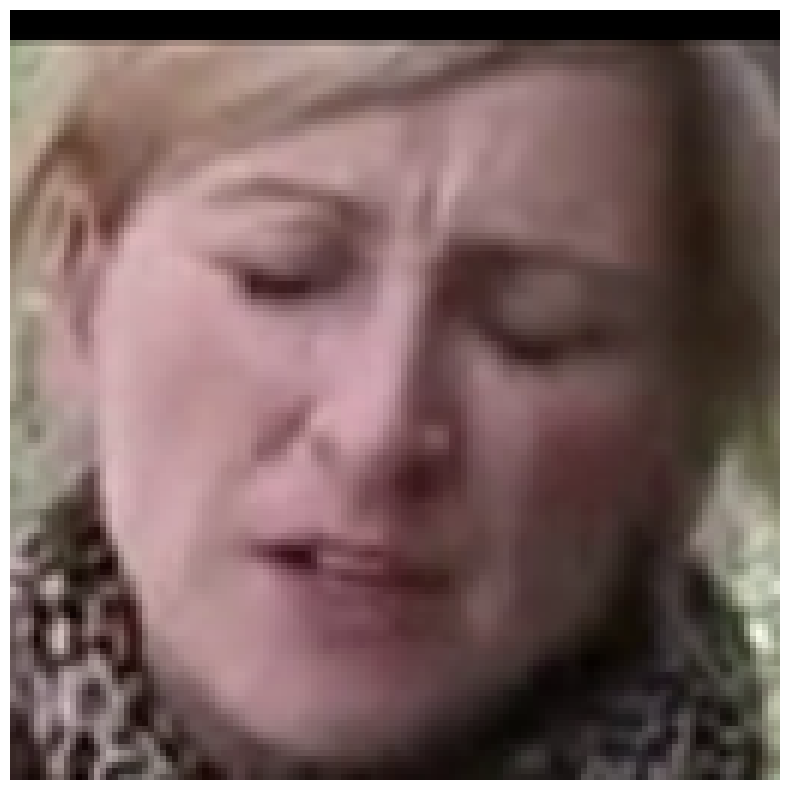

In [51]:
plot_images(imm)

In [52]:
generated_images.shape

(1, 128, 128, 3)

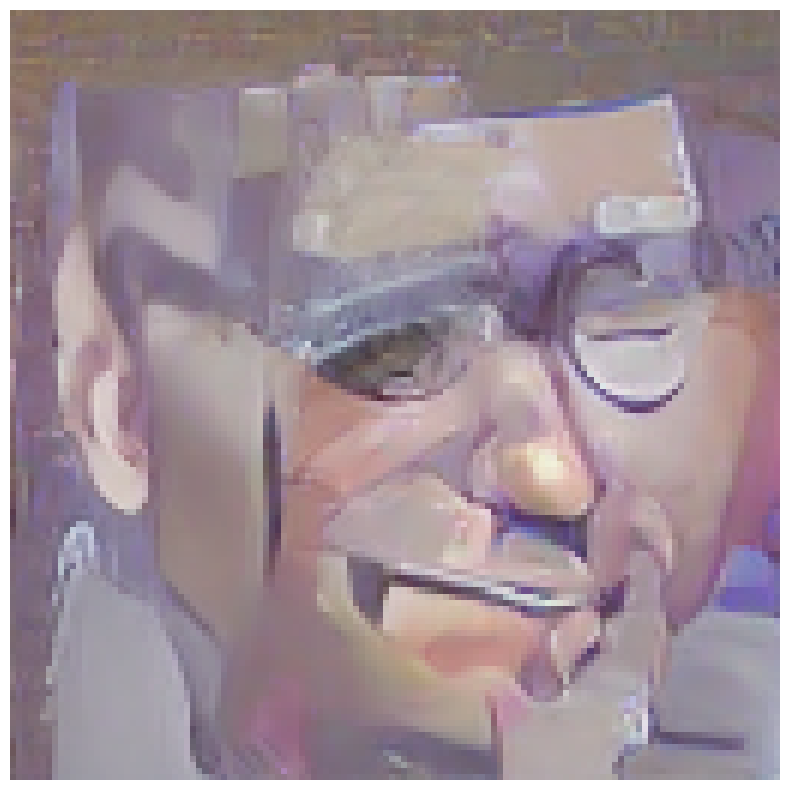

In [53]:
plot_images(generated_images)

In [27]:
asfadsfdsf

NameError: name 'asfadsfdsf' is not defined

In [ ]:
def plot_loss(sample_no,loss_value):

    if(UNET == 1):
        my_file = Path(model_filename + '/loss_total_1.picke')
        if my_file.is_file():
            with open(model_filename + '/loss_total_1.picke', 'rb') as handle:
                loss_total = pickle.load(handle)
        else:
            loss_total = []
    else:
        my_file = Path(model_filename + '/loss_total_2.picke')
        if my_file.is_file():
            with open(model_filename + '/loss_total_2.picke', 'rb') as handle:
                loss_total = pickle.load(handle)
        else:
            loss_total = []
    
    #print(loss_list)
    #print(loss_total)
    loss_total.append([sample_no,loss_value])

    if(UNET == 1):
        with open(model_filename +'/loss_total_1.picke', 'wb') as handle:
            pickle.dump(loss_total, handle)
    else:
        with open(model_filename +'/loss_total_2.picke', 'wb') as handle:
            pickle.dump(loss_total, handle)
    #print(loss_total)
    fig = plt.figure()
    x_val = [x[0] for x in loss_total]
    y_val = [x[1] for x in loss_total]
    plt.plot(x_val,y_val)
    plt.title("Training Loss")
    plt.xlabel("Training Sample")
    plt.ylabel("MSE Loss")
    



    if(UNET == 1):
        if(os.path.isfile(model_filename + '/loss_1_plot.png')):
            os.remove(model_filename + '/loss_1_plot.png')
        fig.savefig(model_filename + '/loss_1_plot.png')
    else:
        if(os.path.isfile(model_filename + '/loss_2_plot.png')):
            os.remove(model_filename + '/loss_2_plot.png')
        fig.savefig(model_filename + '/loss_2_plot.png')
    plt.close()

    try:
        fig = plt.figure()
        plt.plot(x_val[1000::],y_val[1000::]
                ,'.',zorder=-100)

        #plt.axvline(x=1000,linestyle='--',color='green',label='1000 inner epochs')
        #plt.axvline(x=17000,linestyle='--',color='purple',label='100 inner epochs - 100000 unique samples seen' )
        #plt.axvline(x=23100,linestyle='-.',color='black',label='1 inner epoch - end of 1st epoch ')
        #plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
        plt.grid()
        yhat = savgol_filter(y_val, 1000, 3)
        plt.plot(x_val[1000::],yhat[1000::],'r')
        plt.title("Training Loss")
        plt.xlabel("Training Sample")
        plt.ylabel("MSE Loss")
        



        if(UNET == 1):
            if(os.path.isfile(model_filename + '/loss_zoomed_1_plot.png')):
                os.remove(model_filename + '/loss_zoomed_1_plot.png')
            fig.savefig(model_filename + '/loss_zoomed_1_plot.png')
        else:
            if(os.path.isfile(model_filename + '/loss_zoomed_2_plot.png')):
                os.remove(model_filename + '/loss_zoomed_2_plot.png')
            fig.savefig(model_filename + '/loss_zoomed_2_plot.png')
        plt.close()


    except:
        try:
            plt.close()
        except:
            pass


    

In [ ]:
from imagen_pytorch import Unet, Imagen, ImagenTrainer,NullUnet
from imagen_pytorch.data import Dataset

unet0 = NullUnet()  # add a placeholder "null" unet for the base unet

unet1 = Unet(
    dim = unet1_dim,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = 3,
    layer_attns = (False, True, True, True),
    layer_cross_attns = (False, True, True, True)
)

unet2 = Unet(
    dim = unet2_dim,
    cond_dim = 512,
    dim_mults = (1, 2, 4, 8),
    num_resnet_blocks = (2, 4, 8, 8),
    layer_attns = (False, False, False, True),
    layer_cross_attns = (False, False, False, True)
)

if(ignore_image_guide):
    unets = (unet1, unet2)
    image_sizes= (unet1_image_size, image_size)
    unet_to_train = UNET #1
    #start_image_or_video = None
else:
    unets = (unet0,unet1, unet2)
    image_sizes= (begin_with_image_size,unet1_image_size, image_size)
    unet_to_train = UNET + 1 #2
    #start_image_or_video = input2[:1,:]

#print(input2[:1,:])
#print(input2)

imagen = Imagen(
    unets = unets,
    image_sizes = image_sizes,
    timesteps = timesteps,
    cond_drop_prob = 0.1
).cuda()



trainer = ImagenTrainer(
    imagen = imagen,
    split_valid_from_train = False, # whether to split the validation dataset from the training
    checkpoint_every = save_model_every,
    checkpoint_path = model_filename,
    max_checkpoints_keep = 1,
    only_train_unet_number = unet_to_train
).cuda()


trainer.add_train_dataloader(my_dataloader)

#if not os.path.exists(imagen_samples_folder):
#    os.makedirs(imagen_samples_folder)

#my_file = Path(model_filename)
#if my_file.is_file():
#    print('Using model file ' + model_filename)
#    trainer.load(model_filename)

#trainer.load_from_checkpoint_folder()
#print(epochs)
for i in range(epochs):
    
    loss = trainer.train_step(unet_number = unet_to_train,max_batch_size = batch_size)
    print(f'loss: {loss}')
    #print("At sample seen " + str(my_dataset.no_of_samples_seen()))
    plot_loss(my_dataset.no_of_samples_seen(),loss)
    #print(loss_list)
    #trainer.save_to_checkpoint_folder()
    print('epoch:' + str(i+1) + ' from ' + str(epochs))
    last_sample_no = my_dataset.no_of_samples_seen()
    if(UNET == 1):
        with open(model_filename + '/last_sample_no1.picke', 'wb') as handle:
            pickle.dump(last_sample_no, handle)
    else:
        with open(model_filename + '/last_sample_no2.picke', 'wb') as handle:
            pickle.dump(last_sample_no, handle)

ModuleNotFoundError: No module named 'imagen_pytorch'

In [ ]:
epochs = 1
ckpt_path = "finetuned_stable_diffusion.h5"
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    save_weights_only=True,
    monitor="loss",
    mode="min",
)
diffusion_ft_trainer.fit(training_dataset, epochs=epochs, callbacks=[ckpt_callback])

In [ ]:
trainer.save_to_checkpoint_folder()

In [ ]:
from torchvision.utils import save_image
from torchvision.transforms import Resize
cond_scale = random.uniform(5.1, 9.9)
now =time.time()
seconds = now
output, input0 = my_dataset.__getitem__(1)
save_image(output,'ground_truth.png')

In [ ]:
resize_img_tensor = Resize((begin_with_image_size, begin_with_image_size))

if(ignore_image_guide):
    start_image_or_video = None
else:
    start_image_or_video = resize_img_tensor(output)

start_image_or_video = torch.unsqueeze(start_image_or_video,0)
input0 = torch.unsqueeze(input0,0)
output = torch.unsqueeze(output,0)

print(start_image_or_video.shape)
print(input0.shape)
print(output.shape)

images = trainer.sample(text_embeds=input0,start_image_or_video = start_image_or_video,start_at_unet_number = unet_to_train
            ,stop_at_unet_number=unet_to_train,batch_size = 1, return_pil_images = True,cond_scale=cond_scale) # returns List[Image]
images[0].save('generated.png')